In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [37]:
def generate_random_timestamp(start_date, end_date):
    return start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds())))

sample_call_texts = [
    "I need help with my account balance.",
    "My internet is not working properly.",
    "I want to upgrade my plan.",
    "The service has been down for hours.",
    "I'm unable to login to my account.",
    "Can I speak to a manager?",
    "How do I reset my password?",
    "I have a billing issue.",
    "The product I received is defective.",
    "I need to update my payment information.",
    "I need to report a lost card.",
    "How do I track my order?",
    "Can you help me with a refund?",
    "My package hasn't arrived yet.",
    "I want to cancel my subscription.",
    "Can I get a copy of my invoice?",
    "How do I change my shipping address?",
    "The app keeps crashing.",
    "I need technical support.",
    "How do I apply a discount code?",
    "My device isn't charging properly.",
    "What's the status of my repair?",
    "How do I update my email address?",
    "I need assistance with a warranty claim.",
    "Can you explain my recent charges?",
    "I'm having trouble with my online order.",
    "How do I connect to Wi-Fi?",
    "Can I reschedule my appointment?",
    "I need help with my insurance claim.",
    "How do I set up auto-pay?"
]

num_records = 1000  
synthetic_data = {
    'call_identifier': np.arange(1, num_records + 1),
    'call_timestamp': [generate_random_timestamp(datetime(2023, 1, 1), datetime(2023, 12, 31)) for _ in range(num_records)],
    'call_text': [random.choice(sample_call_texts) for _ in range(num_records)],
    'call_duration_seconds': np.random.randint(30, 600, size=num_records),  
    'escalation_required': np.random.randint(0, 2, size=num_records) 
}

synthetic_df = pd.DataFrame(synthetic_data)

synthetic_df.to_csv('synthetic_ivr_data_unique.csv', index=False)
print("Synthetic dataset saved to 'synthetic_ivr_data_unique.csv'")

synthetic_df.head()


Synthetic dataset saved to 'synthetic_ivr_data_unique.csv'


,call_identifier,call_timestamp,call_text,call_duration_seconds,escalation_required
0,1,2023-10-11 03:06:09,What's the status of my repair?,485,0
1,2,2023-08-02 03:07:37,What's the status of my repair?,365,0
2,3,2023-03-04 22:40:51,How do I apply a discount code?,287,1
3,4,2023-03-01 06:04:36,I need to report a lost card.,67,0
4,5,2023-01-13 20:58:09,I need to report a lost card.,221,1


In [38]:
data = pd.read_csv('synthetic_ivr_data_unique.csv')
print(data.columns)
data = data.dropna()
data['call_timestamp'] = pd.to_datetime(data['call_timestamp'])

print(data.head())


Index(['call_identifier', 'call_timestamp', 'call_text',
       'call_duration_seconds', 'escalation_required'],
      dtype='object')
   call_identifier      call_timestamp                        call_text  \
0                1 2023-10-11 03:06:09  What's the status of my repair?   
1                2 2023-08-02 03:07:37  What's the status of my repair?   
2                3 2023-03-04 22:40:51  How do I apply a discount code?   
3                4 2023-03-01 06:04:36    I need to report a lost card.   
4                5 2023-01-13 20:58:09    I need to report a lost card.   

   call_duration_seconds  escalation_required  
0                    485                    0  
1                    365                    0  
2                    287                    1  
3                     67                    0  
4                    221                    1  


In [39]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

if 'call_text' in data.columns:
    print("'call_text' column found.")

    data['sentiment_score'] = data['call_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    print("Sentiment scores added to DataFrame.")
else:
    print("Column 'call_text' not found in the DataFrame.")

print(data.head())
print(data.columns)


'call_text' column found.
Sentiment scores added to DataFrame.
   call_identifier      call_timestamp                        call_text  \
0                1 2023-10-11 03:06:09  What's the status of my repair?   
1                2 2023-08-02 03:07:37  What's the status of my repair?   
2                3 2023-03-04 22:40:51  How do I apply a discount code?   
3                4 2023-03-01 06:04:36    I need to report a lost card.   
4                5 2023-01-13 20:58:09    I need to report a lost card.   

   call_duration_seconds  escalation_required  sentiment_score  
0                    485                    0           0.0000  
1                    365                    0           0.0000  
2                    287                    1           0.0000  
3                     67                    0          -0.3182  
4                    221                    1          -0.3182  
Index(['call_identifier', 'call_timestamp', 'call_text',
       'call_duration_seconds', 'escala

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


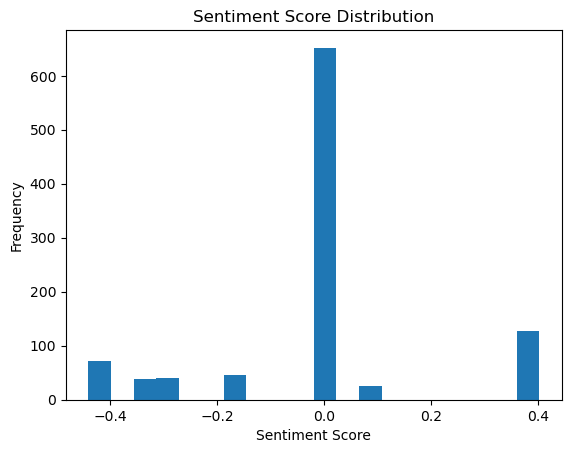

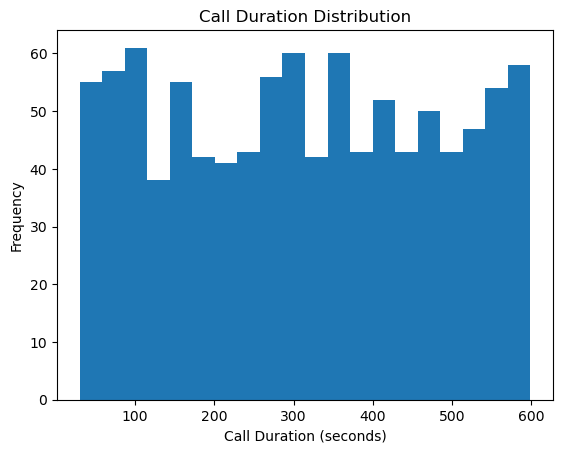

In [40]:
if 'sentiment_score' in data.columns:
   
    plt.hist(data['sentiment_score'], bins=20)
    plt.title('Sentiment Score Distribution')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'sentiment_score' not found in the DataFrame.")

plt.hist(data['call_duration_seconds'], bins=20)
plt.title('Call Duration Distribution')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


In [41]:
X = data[['sentiment_score', 'call_duration_seconds']]
y = data['escalation_required']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.505
Precision: 0.5360824742268041
Recall: 0.49056603773584906
F1-Score: 0.5123152709359605


In [42]:
def generate_empathic_response(sentiment_score):
    if sentiment_score < -0.5:
        return "I'm sorry you're having trouble. Let me connect you to a representative who can assist you further."
    elif sentiment_score < 0:
        return "I understand this can be frustrating. I'll connect you to someone who can help."
    else:
        return "Let me transfer you to a representative who can assist you."


data['empathic_response'] = data['sentiment_score'].apply(generate_empathic_response)

data[['call_text', 'sentiment_score', 'empathic_response']].head()


,call_text,sentiment_score,empathic_response
0,What's the status of my repair?,0.0000,Let me transfer you to a representative who ca...
1,What's the status of my repair?,0.0000,Let me transfer you to a representative who ca...
2,How do I apply a discount code?,0.0000,Let me transfer you to a representative who ca...
3,I need to report a lost card.,-0.3182,I understand this can be frustrating. I'll con...
4,I need to report a lost card.,-0.3182,I understand this can be frustrating. I'll con...


In [43]:
data.head()


,call_identifier,call_timestamp,call_text,call_duration_seconds,escalation_required,sentiment_score,empathic_response
0,1,2023-10-11 03:06:09,What's the status of my repair?,485,0,0.0000,Let me transfer you to a representative who ca...
1,2,2023-08-02 03:07:37,What's the status of my repair?,365,0,0.0000,Let me transfer you to a representative who ca...
2,3,2023-03-04 22:40:51,How do I apply a discount code?,287,1,0.0000,Let me transfer you to a representative who ca...
3,4,2023-03-01 06:04:36,I need to report a lost card.,67,0,-0.3182,I understand this can be frustrating. I'll con...
4,5,2023-01-13 20:58:09,I need to report a lost card.,221,1,-0.3182,I understand this can be frustrating. I'll con...
